In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("/content/BankNifty.csv")
df.dropna(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-23,18762.000000,18909.650391,18722.849609,18842.699219,18842.699219,0.0
1,2017-01-24,18931.000000,19054.300781,18906.949219,19023.500000,19023.500000,0.0
2,2017-01-25,19120.050781,19518.449219,19114.150391,19473.199219,19473.199219,0.0
3,2017-01-27,19588.400391,19794.949219,19534.900391,19708.300781,19708.300781,0.0
4,2017-01-30,19718.800781,19767.050781,19561.099609,19585.250000,19585.250000,0.0


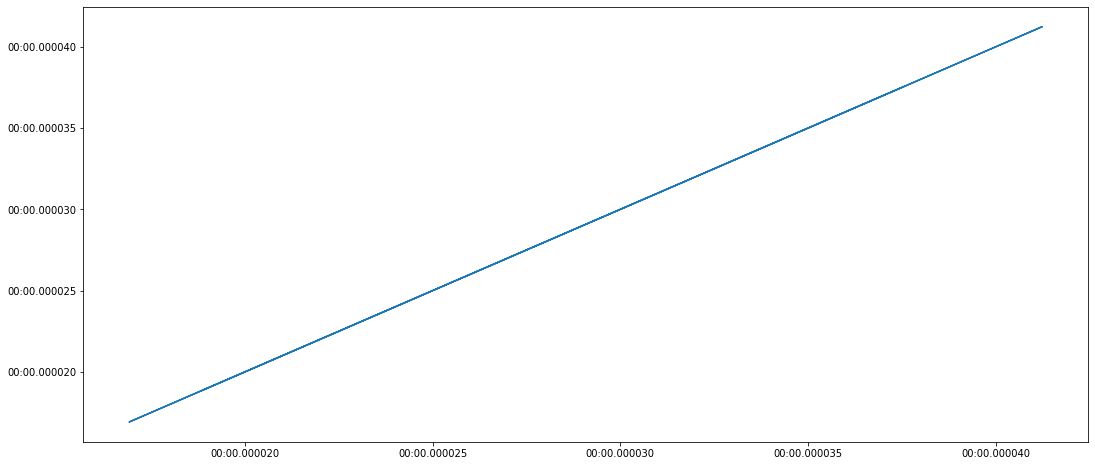

In [ ]:
df["Close"]=pd.to_datetime(df.Close,format="%Y-%m-%d")
df.index=df['Close']
df.dropna()
plt.figure(figsize=(18,8))
plt.plot(df["Close"],label='Close Price history')

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,RSI,MACD,Signal
1231,2022-01-17,38212.550781,38617.500000,38138.250000,38216.148438,38216.148438,140300.0,36613.994532,36948.996719,81.964846,556.823296,278.666664
1232,2022-01-18,38337.398438,38855.550781,38095.398438,38210.300781,38210.300781,168800.0,36794.116992,36924.437735,84.321284,555.815655,334.096462
1233,2022-01-19,38145.750000,38330.500000,37769.250000,38041.351563,38041.351563,165300.0,36944.709571,36897.888750,81.269392,535.214681,374.320106
1234,2022-01-20,38106.101563,38167.949219,37591.851563,37850.851563,37850.851563,149600.0,37077.694727,36874.440781,76.127392,497.778422,399.011769
1235,2022-01-21,37522.351563,37741.000000,37224.250000,37574.300781,37574.300781,157800.0,37213.557227,36854.722813,64.888153,440.714301,407.352275


In [ ]:
data= df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
  new_dataset["Date"][i]=data['Date'][i]
  new_dataset["Close"][i]=data["Close"]
  [i]

In [ ]:
import pandas as pd

# Read stock data from CSV file
df = pd.read_csv('/content/BankNifty.csv')

# Calculate moving averages
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Calculate relative strength index (RSI)
delta = df['Close'].diff()
delta1 = delta.dropna()
gain = delta1.where(delta1 > 0, 0)
loss = -delta1.where(delta1 < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Calculate moving average convergence divergence (MACD)
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Write results to new CSV file
df.to_csv('stock_indicators.csv', index=False)


In [ ]:
delta.head()


1       180.800781
2       449.699219
3       235.101562
4      -123.050781
5       -70.099609
           ...    
1231   -154.250000
1232     -5.847657
1233   -168.949218
1234   -190.500000
1235   -276.550782
Name: Close, Length: 1221, dtype: float64

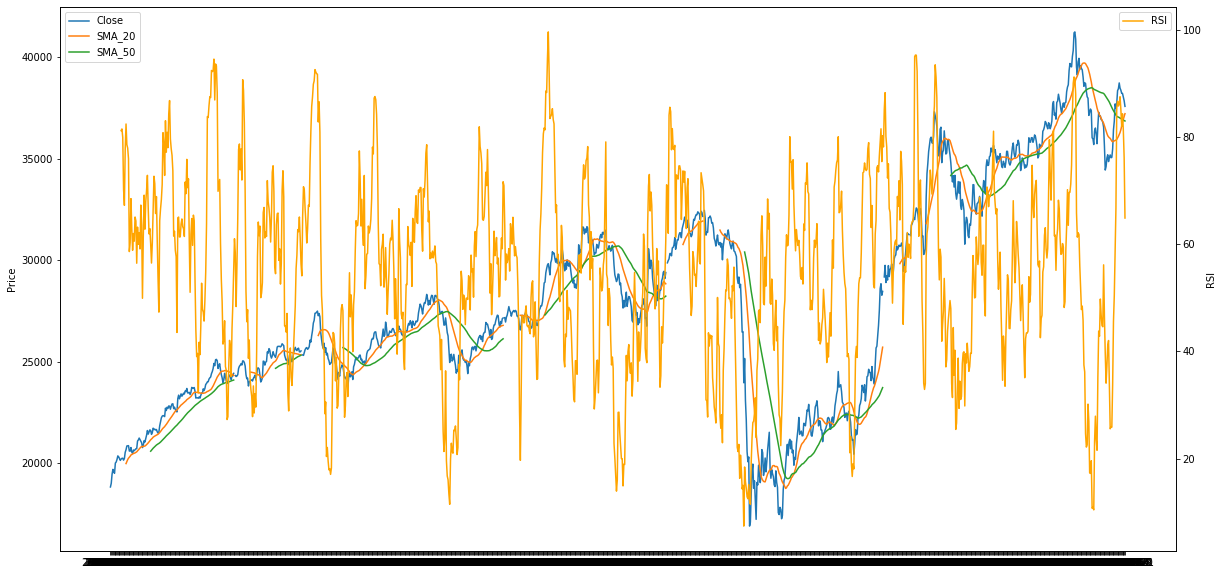

In [ ]:
import matplotlib.pyplot as plt

# Read stock indicators from CSV file
df = pd.read_csv('stock_indicators.csv')

# Plot stock price, moving averages, and RSI
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'], label='Close')
ax.plot(df['Date'], df['SMA_20'], label='SMA_20')
ax.plot(df['Date'], df['SMA_50'], label='SMA_50')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(df['Date'], df['RSI'], label='RSI', color='orange')
ax2.set_ylabel('RSI')
ax2.legend(loc='upper right')

plt.show()


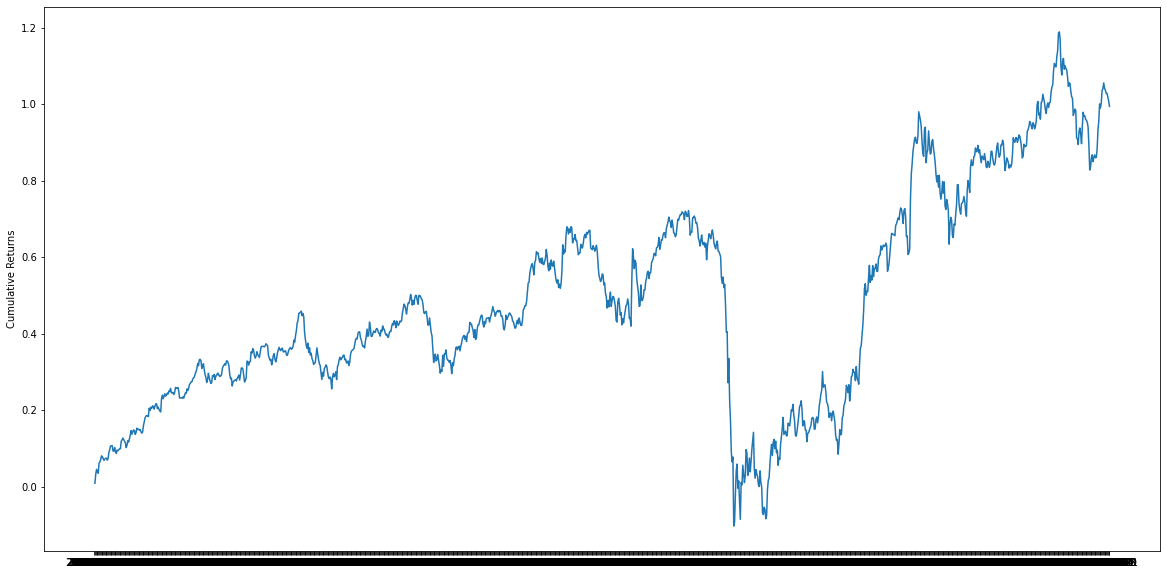

In [ ]:
# Calculate daily percentage returns
df['Returns'] = df['Close'].pct_change()

# Calculate cumulative returns
df['Cumulative Returns'] = (1 + df['Returns']).cumprod() - 1

# Plot cumulative returns
plt.plot(df['Date'], df['Cumulative Returns'])
plt.ylabel('Cumulative Returns')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read stock indicators from CSV file
df = pd.read_csv('stock_indicators.csv')

# Split data into training and testing sets
X = df[['Close', 'SMA_20', 'SMA_50', 'RSI']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model on test data
score = model.score(X_test, y_test)
print('Model R^2 score:', score)


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the dataset
df = pd.read_csv('/content/stock_indicators.csv')

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


In [ ]:
# Create the training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]


In [ ]:
# Create the testing dataset
test_data = scaled_data[train_size - 60:, :]

In [ ]:
# Split the data into X_train and y_train datasets
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
# Reshape the data to be 3-dimensional for LSTM
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=1)

928/928 [==============================] - 28s 26ms/step - loss: nan


In [ ]:
# Test the model
X_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

8/8 [==============================] - 1s 16ms/step


AttributeError: ignored

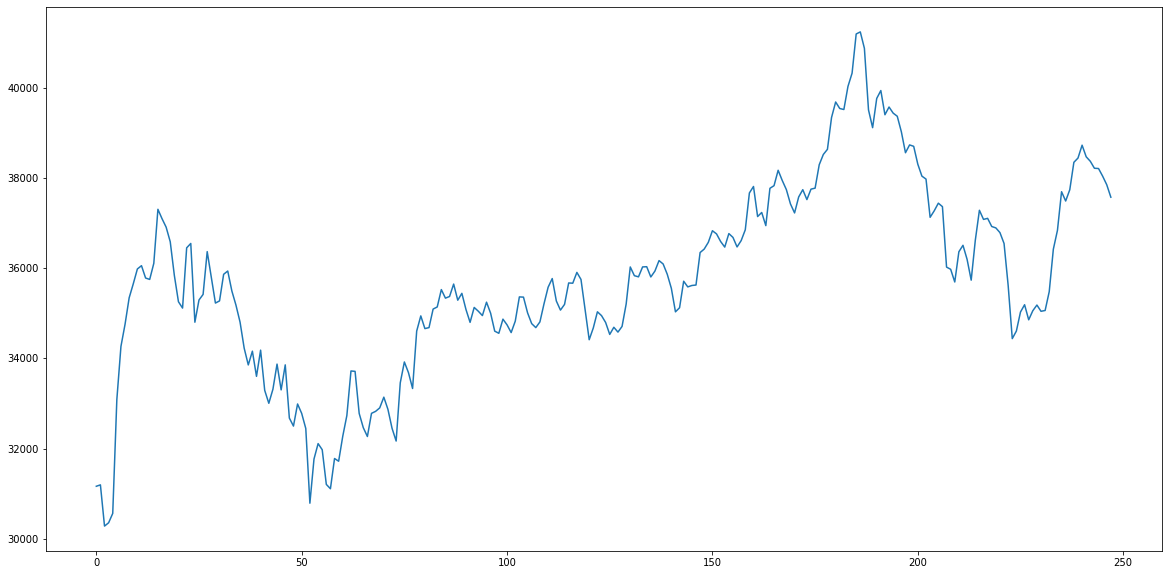

In [ ]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(df['Close'].values[train_size:])
plt.plot(predicted_price)
predicted_price.head()
plt.show()